# Лабораторная работа
# Линейные модели, SVM и деревья решений.
# Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.

## Задание:
Выберите набор данных (датасет) для решения задачи классификации или регрессии.

В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

С использованием метода train_test_split разделите выборку на обучающую и тестовую.

Обучите следующие модели:
одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
SVM;
дерево решений.

Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.

Постройте график, показывающий важность признаков в дереве решений.
Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import operator

In [4]:
def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

wine = load_wine()

df = make_dataframe(load_wine)

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [6]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
df.target.unique()

array([0., 1., 2.])

In [8]:

df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [12]:
def count_nan(data):
    for col in data.columns:
        count_nan = data[data[col].isnull()].shape[0]
        print('{} имеет NAN: {}'.format(col, count_nan))
count_nan(df)

alcohol имеет NAN: 0
malic_acid имеет NAN: 0
ash имеет NAN: 0
alcalinity_of_ash имеет NAN: 0
magnesium имеет NAN: 0
total_phenols имеет NAN: 0
flavanoids имеет NAN: 0
nonflavanoid_phenols имеет NAN: 0
proanthocyanins имеет NAN: 0
color_intensity имеет NAN: 0
hue имеет NAN: 0
od280/od315_of_diluted_wines имеет NAN: 0
proline имеет NAN: 0
target имеет NAN: 0


# В данном датасете много значений которые варируютсяв разных чилосвых диапазонах, а тк мы используем линейные можели нужно выполнить нормализацию

In [16]:
x_data = df.drop('target', axis = 1)
scaler = MinMaxScaler()
x_scaled_data = scaler.fit_transform(x_data)

# Разделение на тестовую и обучающую выборки

In [19]:
y_target = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled_data, y_target, test_size = 0.3, random_state = 1)

## Логическая регрессия https://academy.yandex.ru/handbook/ml/article/linear-models

In [24]:
lr = LogisticRegression(random_state=1)
lr_model = lr.fit(X_train, Y_train)
lr_predict = lr_model.predict(X_test)

## SVM https://www.helenkapatsa.ru/mietod-opornykh-viektorov/

In [26]:
svc = svm.SVC(random_state=1)
svc_model = svc.fit(X_train, Y_train)
svc_predict = svc_model.predict(X_test)

## Дерево решений https://academy.yandex.ru/handbook/ml/article/reshayushchiye-derevya

In [30]:
dt = DecisionTreeClassifier(random_state=1)
dt_model = dt.fit(X_train, Y_train)
dt_predict = dt_model.predict(X_test)

# Оценим качество трех моделей

## 1) accuracy_score

In [33]:
print("Logistic regression: ", accuracy_score(Y_test, lr_predict))
print("SVM: ", accuracy_score(Y_test, svc_predict))
print("Decision tree: ", accuracy_score(Y_test, dt_predict))

Logistic regression:  0.9814814814814815
SVM:  0.9814814814814815
Decision tree:  0.9444444444444444


## 2) Матрица ошибок или Confusion Matrix

### Логистическая регрессия

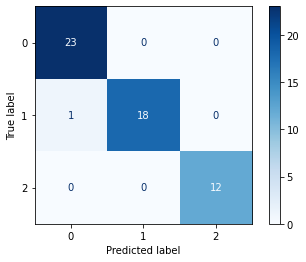

In [47]:
cm = confusion_matrix(Y_test, lr_predict)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2']).plot(cmap="Blues")

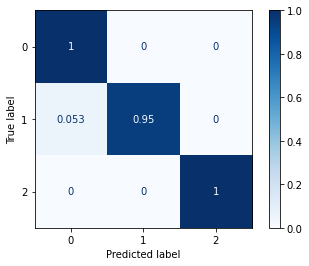

In [48]:
cm = confusion_matrix(Y_test, lr_predict, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2']).plot(cmap="Blues")

### SVM

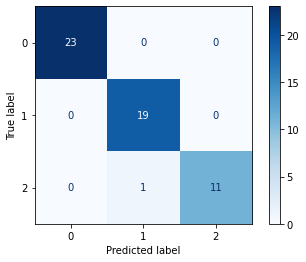

In [51]:
cm = confusion_matrix(Y_test, svc_predict)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2']).plot(cmap="Blues")

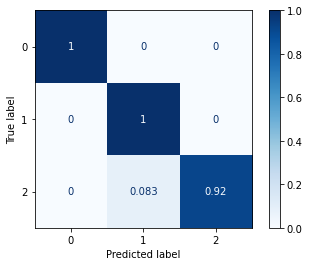

In [52]:
cm = confusion_matrix(Y_test, svc_predict, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2']).plot(cmap="Blues")

### Дерево решений

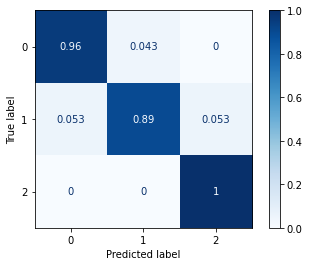

In [54]:
cm = confusion_matrix(Y_test, dt_predict, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2']).plot(cmap="Blues")

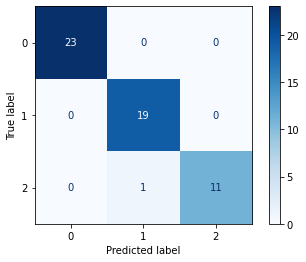

In [56]:
cm = confusion_matrix(Y_test, svc_predict)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2']).plot(cmap="Blues")

# Постройте график, показывающий важность признаков в дереве решений. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

## Важность признаков в дереве

In [60]:
list(zip(x_data.columns.values, dt.feature_importances_))

[('alcohol', 0.0679824561403509),
 ('malic_acid', 0.024111111111111114),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.37183383991894625),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.023647992530345427),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.1055713952247566),
 ('proline', 0.40685320507448963)]

In [74]:
import pandas as pd

def visual_feature_importances(values, model, heigth, width):
    feature_importances = list(zip(x_data.columns.values, dt.feature_importances_))
    sort_feature_importances = sorted(feature_importances, key=operator.itemgetter(1), reverse = True)
    labels = [name for name,value in sort_feature_importances]
    values = [value for name,value in sort_feature_importances]
    
    fig, ax = plt.subplots(figsize=(heigth, width))
    ind = np.arange(len(labels))
    plt.bar(ind, values)
    plt.xticks(ind, labels, rotation='vertical')
    for a,b in zip(ind, values):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, values
    
    


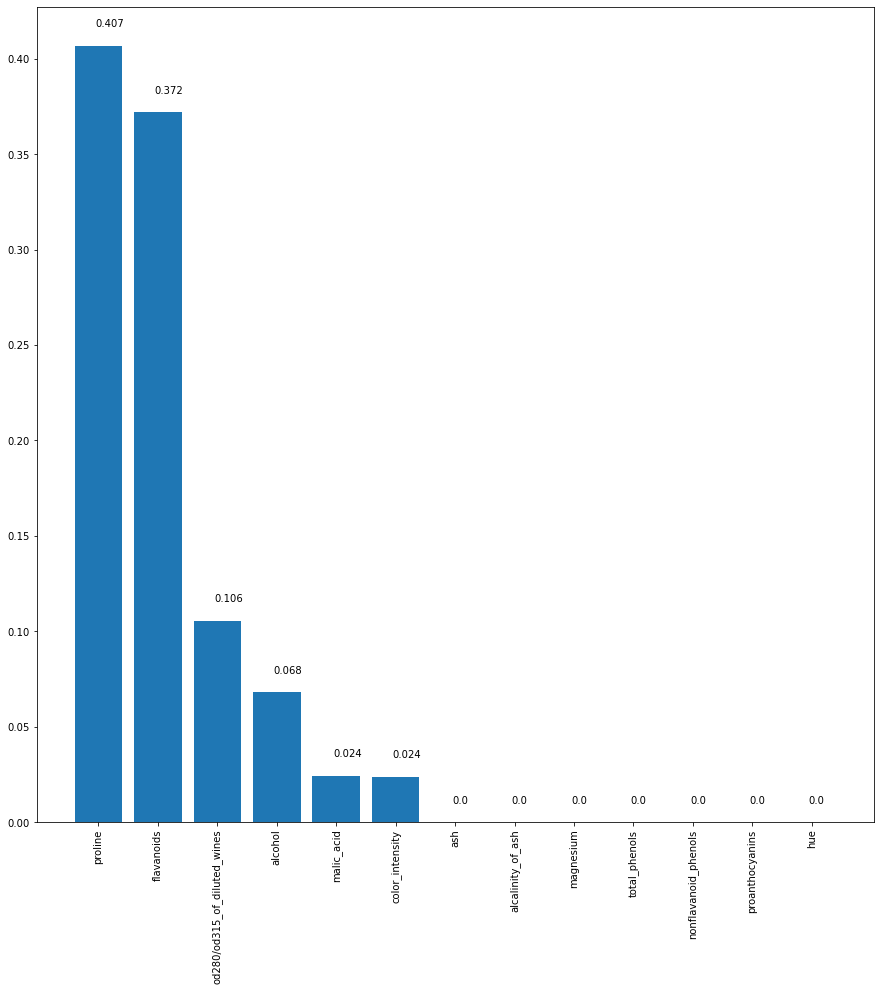

In [76]:
dt_labels, dt_values = visual_feature_importances(x_data.columns, dt.feature_importances_, 15, 15)

## Визуализация дерева решений

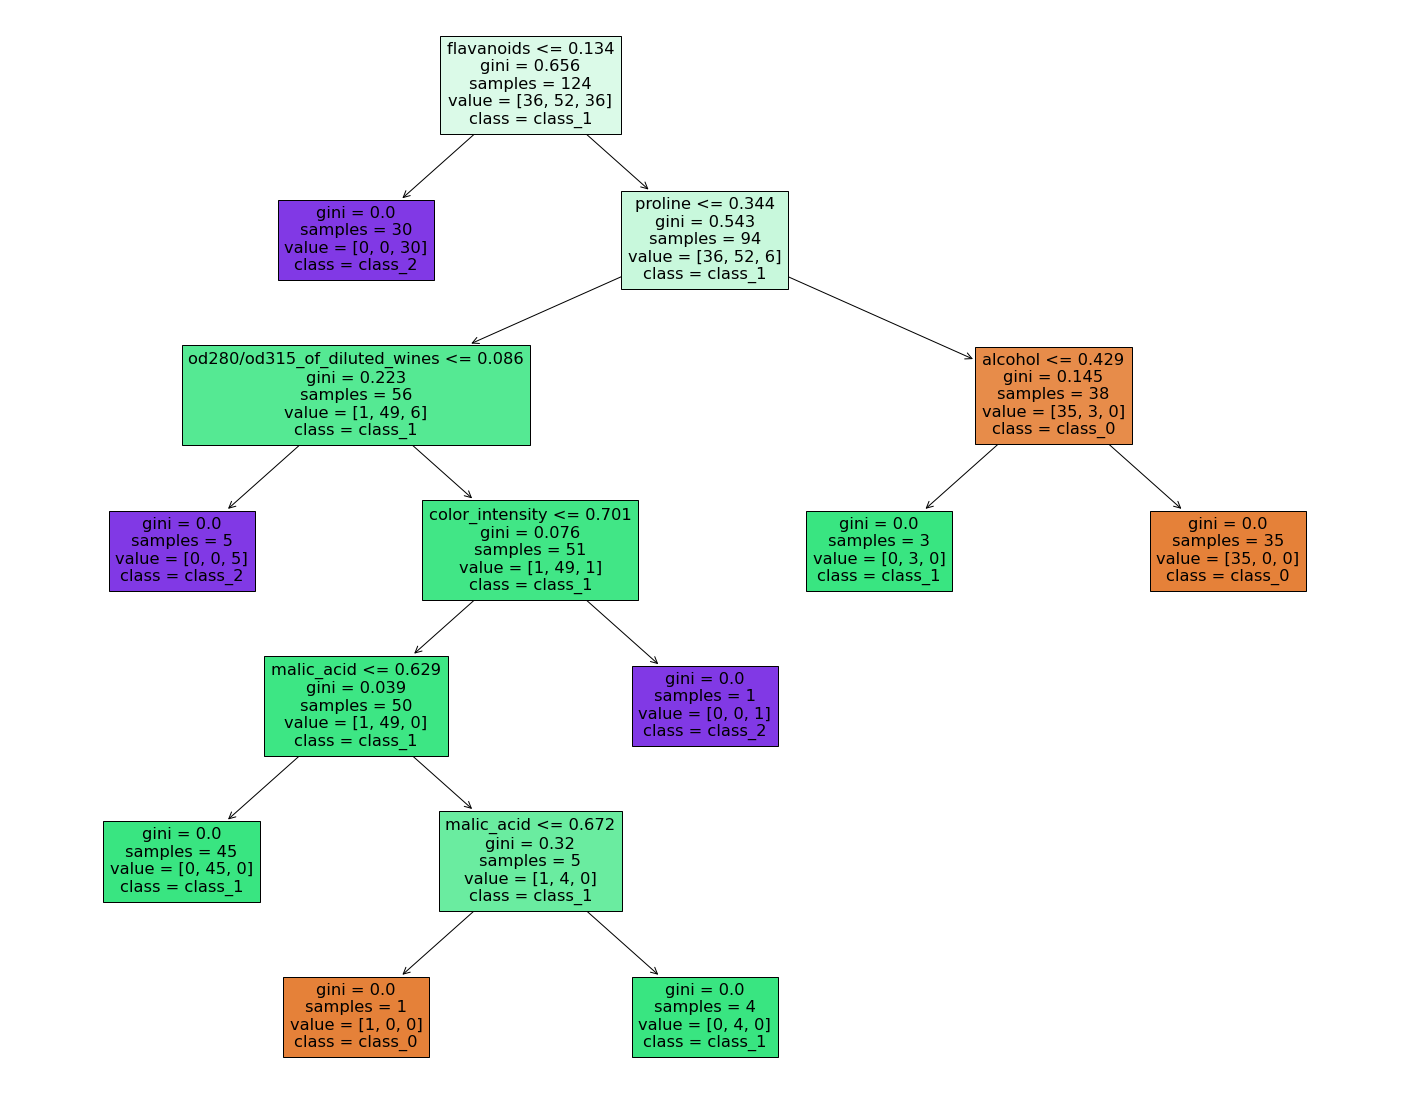

In [81]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model, 
                   feature_names=wine.feature_names,  
                   class_names=wine.target_names,
                   filled=True)